<a href="https://colab.research.google.com/github/Zbicze/myappsample/blob/master/GPW_1_0_develop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPW - Analiza finansowa spółek

Podaj nazwę: debica
Ilość wierszy 19
Ilość kolumn 17
Ilość wczytanych wierszy  7
Ilość wierszy 12
Ilość kolumn 17
Ilość wczytanych wierszy  13
Ilość wierszy 36
Ilość kolumn 17
Ilość wczytanych wierszy  17
Wklad [['Kategoria', '2018', '2019', '2020', '2021', '2022'], ['Liczba akcji', '13802750', '13802750', '13802750', '13802750', '13802750'], ['Cena akcji', '59.60', '59.60', '59.60', '59.60', '59.60'], ['Przychody ze sprzedaży', '1932268', '2056055', '1815175', '2342828', '3077031'], ['Zysk operacyjny (EBIT)', '99622', '119747', '80256', '50880', '35940'], ['Zysk netto', '89752', '112739', '68392', '42679', '36051'], ['Zysk netto akcjonariuszy jednostki dominującej', '89752', '112739', '68392', '42679', '36051'], ['Przepływy pieniężne z działalności operacyjnej', '184991', '188947', '177900', '219014', '150856'], ['Amortyzacja', '98797', '92849', '96515', '97516', '97004'], ['Przepływy pieniężne z działalności inwestycyjnej', '-70495', '-78022', '-112442', '-190762', '-133680'], ['CAPE

<Figure size 432x288 with 0 Axes>

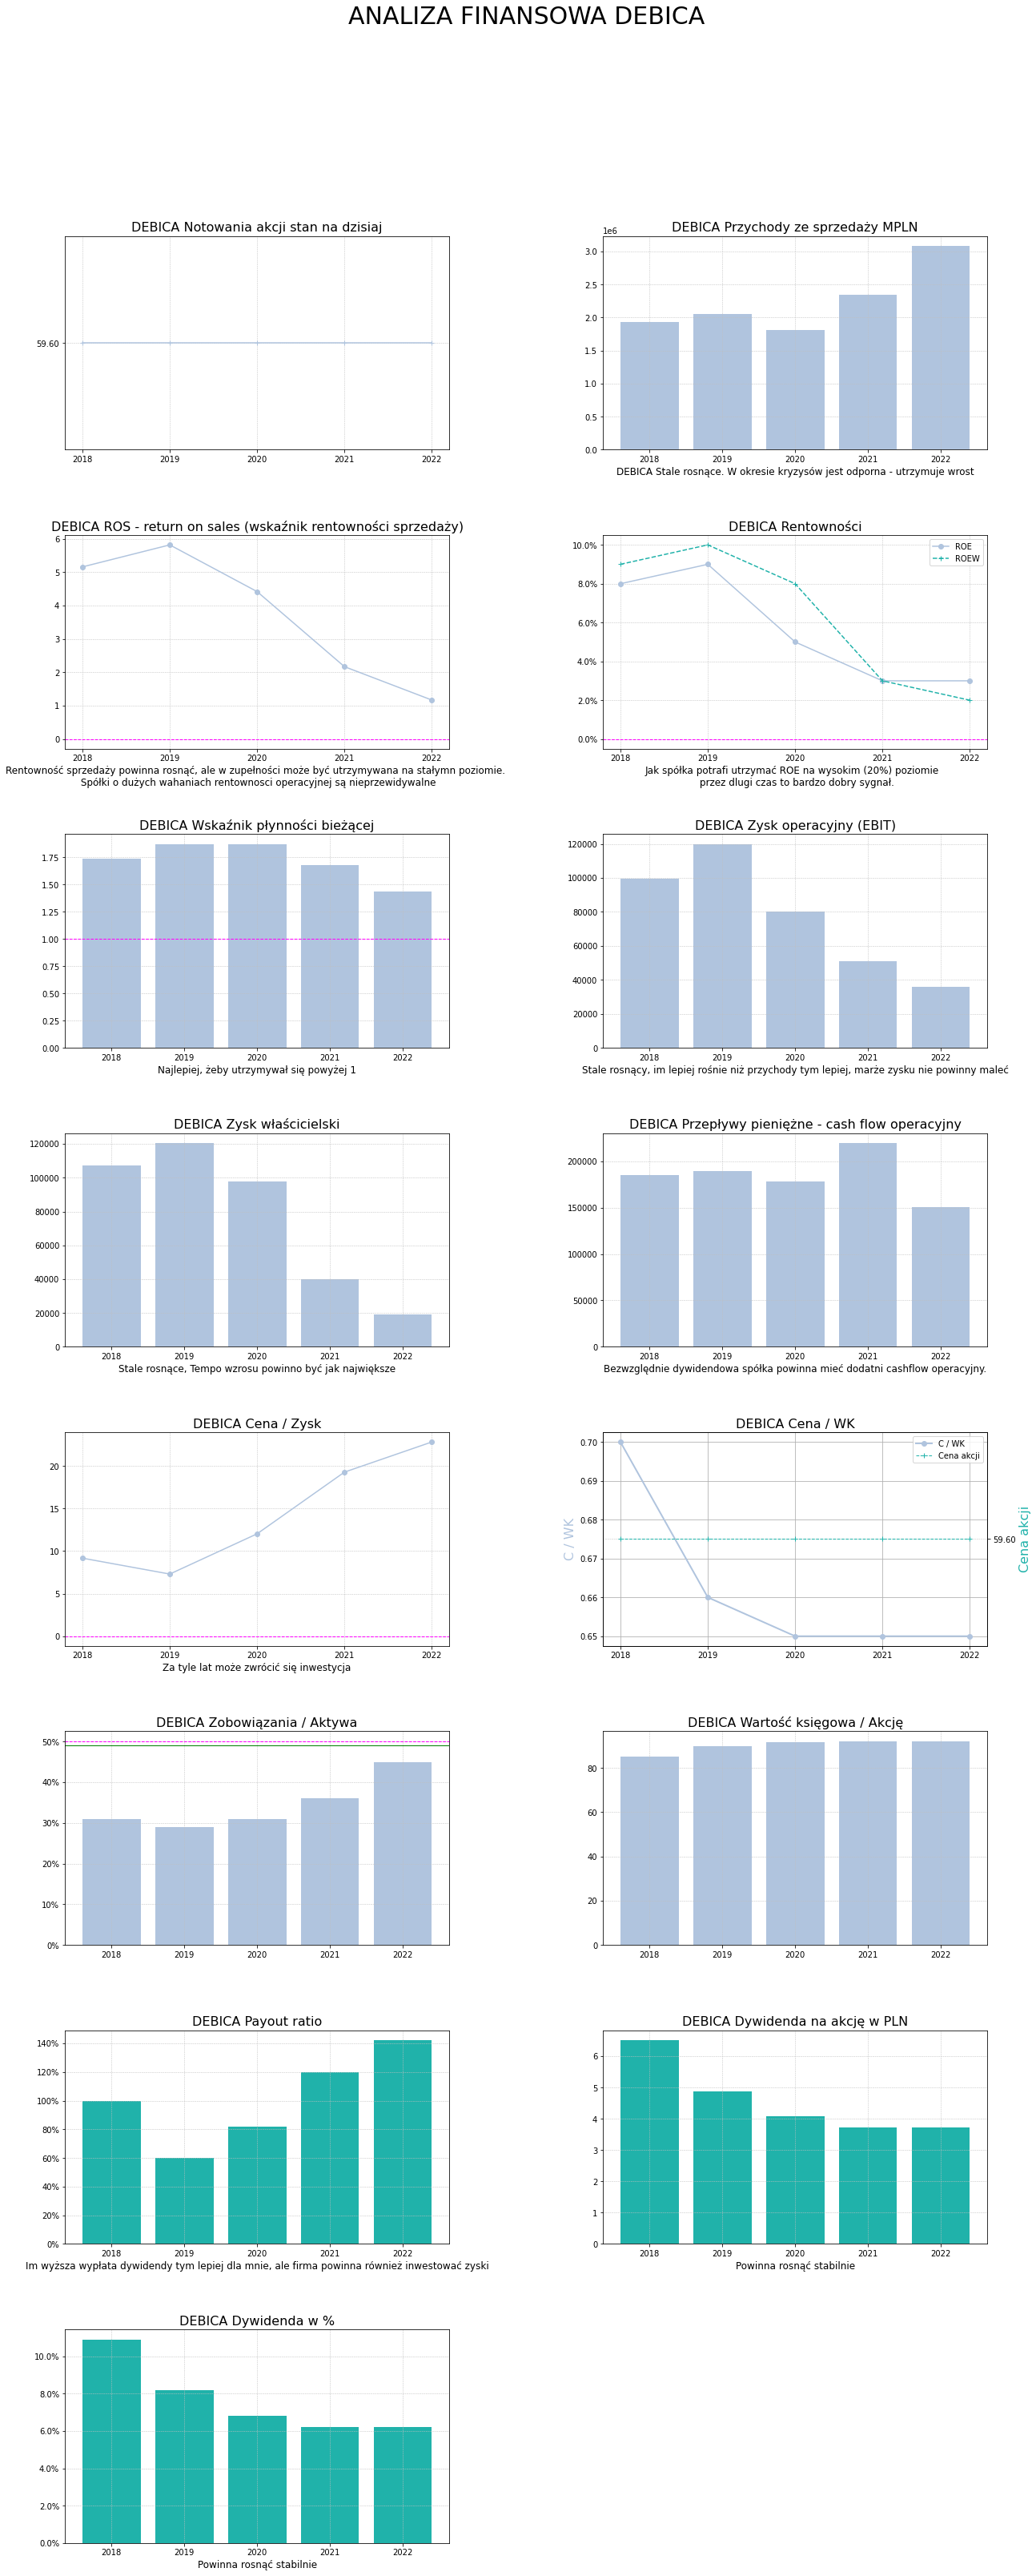

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd 
import urllib.request
import csv
import os
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas.tseries.offsets import YearEnd
import datetime
import matplotlib.ticker as mtick
from datetime import datetime	

class Spolka_Typowa:
  przychody = []
  zajd = []
  ebit = []
  przeplywy_operacyjne= []
  wsk_plynnosci_biezacej= []
  ROS= []
  ROE= []
  ROEW= []
  zysk_wlascicielski= []
  zysk_na_akcje= []
  dywidenda_na_akcje = []
  payout_ratio= []
  procent_dywidendy= []
  WK= []
  WKA= []
  CZ= []
  CWK= []
  zobowiazania_aktywa= []
  zobowiazania =[]
  moja_lista = []



  wiersze= [['Kategoria','2018', '2019', '2020', '2021', '2022']]
  okres= ['2018', '2019', '2020', '2021', '2022']

  path = '/content/drive/MyDrive/Colab Notebooks/Skrypty/APP_GPW/Temp/'
  path_raporty_koncowe = '/content/drive/MyDrive/Colab Notebooks/Skrypty/APP_GPW/Output/'


  def __init__(self, spolka):
    self.spolka = spolka.upper()


  def wczytaj_kurs(self):
    obiekt = urllib.request.urlopen('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/'+self.spolka)
    soup = BeautifulSoup(obiekt, 'html.parser')    
    cena_akcji = soup.find('span', attrs={'class': 'q_ch_act'}).get_text() #
    informacje= soup.find('table', attrs={'class': 'profileSummary'})
    liczba_akcji= informacje.find('a').get_text().strip().replace(' ','') #
    self.wiersze.insert(1,['Liczba akcji', liczba_akcji,liczba_akcji,liczba_akcji,liczba_akcji,liczba_akcji])
    self.wiersze.insert(2,['Cena akcji',  cena_akcji, cena_akcji, cena_akcji, cena_akcji, cena_akcji])


  def zapisz(self, _wklad):
    with open(self.path + self.spolka+'.csv','w', newline='') as plik_wynikowy:
      csv_output = csv.writer(plik_wynikowy)
      print('Wklad', _wklad)
      csv_output.writerows(_wklad)

  def wczytaj_csv(self):
    plik = self.path + self.spolka+'.csv'
    lista_csv = pd.read_csv(plik)
    lista_csv.set_index("Kategoria", inplace = True)
    lista_csv.sort_values("Kategoria")
    lista_csv = pd.DataFrame(lista_csv)
    lista_csv
    return lista_csv

  def pobierz(self):
    lista_stron = ['https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/'+self.spolka,'https://www.biznesradar.pl/raporty-finansowe-przeplywy-pieniezne/'+self.spolka, 'https://www.biznesradar.pl/raporty-finansowe-bilans/'+self.spolka]
  
    lista_cech = ['Kategoria','Liczba akcji','Cena akcji', 'Przychody ze sprzedaży','Zysk operacyjny (EBIT)','Zysk netto akcjonariuszy jednostki dominującej',
    'Przepływy pieniężne z działalności operacyjnej','Przepływy pieniężne z działalności inwestycyjnej','Przepływy pieniężne z działalności finansowej', 'Amortyzacja', 'CAPEX (niematerialne i rzeczowe)','Dywidenda',
    'Aktywa razem','Zobowiązania długoterminowe', 'Aktywa obrotowe','Zobowiązania krótkoterminowe','Zysk netto' ]
    lista_cech.sort()

    for strona in lista_stron:
      obiekt = urllib.request.urlopen(strona)
      soup = BeautifulSoup(obiekt, 'html.parser')  
      tabela = soup.find('table', attrs={'class': 'report-table'})
      ilosc_wierszy = tabela.find_all('tr')
      ilosc_kolumn = tabela.find_all('th', attrs={'class': 'thq h'}) 
      print('Ilość wierszy', len(ilosc_wierszy)-1)
      print('Ilość kolumn', len(ilosc_kolumn)-1)

      data1 = []
      nazwa_wiersza = []
  
      for wiersz in ilosc_wierszy:
        data1 = wiersz.find_all('td', attrs={'class': 'h'})
        nazwa_wiersza = wiersz.find_all('td', attrs={'class': 'f'})        

        if len(data1) == 0:
          continue

        kol_kategoria = nazwa_wiersza[0].get_text()
        kol_2018 = data1[-5].getText().replace(' ','').split('r/r')
        kol_2019 = data1[-4].getText().replace(' ','').split('r/r')
        kol_2020 = data1[-3].getText().replace(' ','').split('r/r')
        kol_2021 = data1[-2].getText().replace(' ','').split('r/r')
        kol_2022 = data1[-1].getText().replace(' ','').split('r/r')

        # print(kol_kategoria in lista_cech)

        if kol_kategoria in lista_cech:
            self.wiersze.append([kol_kategoria, kol_2018[0], kol_2019[0], kol_2020[0], kol_2021[0], kol_2022[0]])
        
      print('Ilość wczytanych wierszy ', len(self.wiersze))
      # print(self.wiersze)
    self.zapisz(self.wiersze)


  def oblicz(self):
    self.dane = self.wczytaj_csv()

    for i in self.okres:
      self.zajd.append(round(int(self.dane.loc["Zysk netto akcjonariuszy jednostki dominującej",i])/1000,2))
      self.zobowiazania.append((round(self.dane.loc['Zobowiązania długoterminowe', i] + self.dane.loc['Zobowiązania krótkoterminowe',i],2)))
      self.przychody.append(round(int(self.dane.loc['Przychody ze sprzedaży',i]),2))
      self.wiersze.append(self.dane.loc['Cena akcji',i])
      self.ebit.append(round(self.dane.loc['Zysk operacyjny (EBIT)', i],2))
      self.przeplywy_operacyjne.append(round(self.dane.loc['Przepływy pieniężne z działalności operacyjnej', i ],2))
      self.wsk_plynnosci_biezacej.append(round(int(self.dane.loc['Aktywa obrotowe',i]) / int(self.dane.loc['Zobowiązania krótkoterminowe',i]) ,2)) #aktywa obrotowe / zobowiazania krotkoterminowe
      
      self.ROS.append((round(int(self.dane.loc['Zysk operacyjny (EBIT)',i]) / int(self.dane.loc['Przychody ze sprzedaży', i])*100 , 2))) #ROS”. return on sales (wskaźnik rentowności sprzedaży) Zysk Op/Przy ·
      
      self.ROE.append(round(int(self.dane.loc['Zysk netto',i]) 
                      / (int(self.dane.loc['Aktywa razem',i]) 
                      - (int(self.dane.loc['Zobowiązania długoterminowe',i]) 
                      + int(self.dane.loc['Zobowiązania krótkoterminowe',i])))
                      ,2)) #ROE zysk netto/ kapital wlasny *100% #ajd/wk*100 eturn on equity, ROE, stopa zwrotu z kapitału własnego lub rentowność kapitału własnego) 

      self.ROEW.append(round((self.dane.loc['Zysk netto akcjonariuszy jednostki dominującej',i]
                        + self.dane.loc['Amortyzacja',i] 
                        - self.dane.loc['CAPEX (niematerialne i rzeczowe)',i] )
                      / (self.dane.loc['Aktywa razem',i] 
                      - (self.dane.loc['Zobowiązania długoterminowe',i] 
                      + self.dane.loc['Zobowiązania krótkoterminowe',i]))
                      ,2))  #zysk_wlascicielski/WK *100

      self.zysk_wlascicielski.append(round(self.dane.loc['Zysk netto akcjonariuszy jednostki dominującej',i] 
                              + self.dane.loc['Amortyzacja',i] 
                              - self.dane.loc['CAPEX (niematerialne i rzeczowe)',i],2)) #ajd+amortyzacja-capex 

      self.dywidenda_na_akcje.append((round((self.dane.loc['Dywidenda',i]*1000/self.dane.loc['Liczba akcji',i]),3)))
      self.procent_dywidendy.append((round((self.dane.loc['Dywidenda',i]*1000/self.dane.loc['Liczba akcji',i])/self.dane.loc['Cena akcji',i],3))) #(dywidenda/akcje) / akt kurs
      # print(cena_akcji[-1])
    

      self.WK.append(round(self.dane.loc['Aktywa razem',i] - (self.dane.loc['Zobowiązania długoterminowe',i] + self.dane.loc['Zobowiązania krótkoterminowe',i]),2))
      
      self.WKA.append(
                (round(
                    (self.dane.loc['Aktywa razem',i] 
                - (self.dane.loc['Zobowiązania długoterminowe',i] + self.dane.loc['Zobowiązania krótkoterminowe',i])) *1000
                / self.dane.loc['Liczba akcji',i],
                2))
                )

      self.CZ.append(round(
              self.dane.loc['Cena akcji',i]/
              (
                  self.dane.loc['Zysk netto',i]/self.dane.loc['Liczba akcji',i]
              )/1000,2)) #kurs/(zysknetto/liczba akcji)

      self.CWK.append(round(
            (
              self.dane.loc['Cena akcji',i]
              / 
              (
                  (
                      self.dane.loc['Aktywa razem',i]- self.dane.loc['Zobowiązania długoterminowe',i]- self.dane.loc['Zobowiązania krótkoterminowe',i] 
                )
                  /self.dane.loc['Liczba akcji',i]
              ))/1000 , 2           
          ))
                      
      self.zobowiazania_aktywa.append(round(
              (self.dane.loc['Zobowiązania długoterminowe',i]+ self.dane.loc['Zobowiązania krótkoterminowe',i]) 
          /self.dane.loc['Aktywa razem',i],2)
      )
      self.zysk_na_akcje.append((round(self.dane.loc['Zysk netto',i]*100/self.dane.loc['Liczba akcji',i],3)))
      self.payout_ratio.append(round( #earnings per share / divident per share
              (
                  (
                      (self.dane.loc['Dywidenda',i]*100)/(self.dane.loc['Liczba akcji',i]) 
              ) / 
              ((self.dane.loc['Zysk netto akcjonariuszy jednostki dominującej',i]
                        #  + self.dane.loc['Amortyzacja',i] 
                        #  - self.dane.loc['CAPEX (niematerialne i rzeczowe)',i] 
                    )*100 / self.dane.loc['Liczba akcji',i]
                  )
              ),2
      ))      #(dywidenda *100/liczba akcji)/Zysk wlascicielski na akcje


    print('\nPrzychody ', self.przychody) #830 503	922 915
    print('ZAJD ', self.zajd) #107 820	111 425
    print('EBIT ', self.ebit) #106 608	115 010
    # print('Cena Akcji', self.self.dane.loc["Cena akcji",0])
    # print('Liczba Akcji', self.self.dane.loc["Liczba akcji",0])
    print('\nPrzeplywy pieniężne cash flow operacyjny ', self.przeplywy_operacyjne) #353 400	-167 000	-168 600
    print('Wskaznik płynnosci bieżącej ',self.wsk_plynnosci_biezacej)  #	1 811 500 ,	1 667 600 / 	1 228 200	1 092 200 = 1.474, 1,53
    print('ROS ', self.ROS)
    print('ROE ', self.ROE)
    print('ROEW ', self.ROEW)
    print('Zysk wlascicielski ', self.zysk_wlascicielski)
    print('\nZysk na akcję ', self.zysk_na_akcje)
    print('Dywidenda na akcje ', self.dywidenda_na_akcje)
    print("Payout ratio ", self.payout_ratio) #41,5%
    print('Procent dywidendy ', self.procent_dywidendy)
    print('\nWK ', self.WK) #1,142,900, 1 135 500
    print('WKA ', self.WKA) #18 - 19
    print("Cena / Zysk ", self.CZ)
    print("Cena/ WK ", self.CWK)
    print("Zobowiązania / aktywa ", self.zobowiazania_aktywa)

  def wykresy(self):
    import datetime
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick
    import numpy as np
    from datetime import datetime	

    # Style
    titleSize = 16
    labelFontSize = 12
    plt.markersize = 7
    plt.linewidth = 3
    kolor_wykresu_blue = "lightsteelblue"
    kolor_wykresu_green = "lightseagreen"

    # layout tła pod wykresami oraz tła wykresów
    plt.figure(facecolor='black')
    plt.figure(figsize=(20, 50))

    # plt.tight_layout()
    plt.titlesize = 13  # font size of the axes title
    kolor_siatki = 'silver'
    # plt.rcParams['savefig.facecolor'] = "0.8"
    plt.rcParams['savefig.facecolor'] = 'whitesmoke'

    #Nagłówek PDFa
    plt.suptitle("ANALIZA FINANSOWA " + self.spolka, fontsize=30)

    # print(self.okres, self.cena_akcji)
    cena_akcji = self.wiersze[2][1:6]
    liczba_akcji = self.wiersze[1][1:6]

  # WYKRESY
    threshold_0=0
    threshold = 1
    plt.subplot(8, 2, 1)
    plt.plot(self.okres, cena_akcji, marker='+', color=kolor_wykresu_blue)
    plt.title(self.spolka + ' Notowania akcji stan na dzisiaj', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)

    print(self.przychody)
    plt.subplot(8, 2, 2)
    plt.bar(self.okres, self.przychody, color=kolor_wykresu_blue)
    plt.xlabel(self.spolka + ' Stale rosnące. W okresie kryzysów jest odporna - utrzymuje wrost', fontsize=labelFontSize)
    plt.title(self.spolka + ' Przychody ze sprzedaży MPLN', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')

    plt.subplot(8, 2, 3)
    plt.plot(self.okres, self.ROS, marker='o', color=kolor_wykresu_blue)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Rentowność sprzedaży powinna rosnąć, ale w zupełności może być utrzymywana na stałymn poziomie. \n Spółki o dużych wahaniach rentownosci operacyjnej są nieprzewidywalne",
        fontsize=labelFontSize)
    plt.title(self.spolka + ' ROS - return on sales (wskaźnik rentowności sprzedaży)', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')

    plt.subplot(8, 2, 4)
    plt.plot(self.okres, self.ROE, marker='o', color=kolor_wykresu_blue, label="ROE")
    plt.plot(self.okres, self.ROEW, marker='+',linestyle='--', color=kolor_wykresu_green,label="ROEW")
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Jak spółka potrafi utrzymać ROE na wysokim (20%) poziomie  \n przez dlugi czas to bardzo dobry sygnał.",
                fontsize=labelFontSize)
    plt.title(self.spolka + ' Rentowności', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.legend()

    plt.subplot(8, 2, 5)
    plt.bar(self.okres, self.wsk_plynnosci_biezacej, color=kolor_wykresu_blue)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Najlepiej, żeby utrzymywał się powyżej 1", fontsize=labelFontSize)
    plt.title(self.spolka + ' Wskaźnik płynności bieżącej', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold, linewidth=1, linestyle='--', color='fuchsia')

    plt.subplot(8, 2, 6)
    plt.bar(self.okres, self.ebit, color=kolor_wykresu_blue)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Stale rosnący, im lepiej rośnie niż przychody tym lepiej, marże zysku nie powinny maleć",
                fontsize=labelFontSize)
    plt.title(self.spolka + ' Zysk operacyjny (EBIT)', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')

    plt.subplot(8, 2, 7)
    plt.bar(self.okres, self.zysk_wlascicielski, color=kolor_wykresu_blue)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Stale rosnące, Tempo wzrosu powinno być jak największe", fontsize=labelFontSize)
    plt.title(self.spolka + ' Zysk właścicielski', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')

    plt.subplot(8, 2, 8)
    plt.bar(self.okres, self.przeplywy_operacyjne, color=kolor_wykresu_blue)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Bezwzględnie dywidendowa spółka powinna mieć dodatni cashflow operacyjny.", fontsize=labelFontSize)
    plt.title(self.spolka + ' Przepływy pieniężne - cash flow operacyjny', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')

    from datetime import datetime

    def Average(lst):
        return sum(lst) / len(lst)

    threshold_payout_ratio = 1
    threshold_zobowiazania_aktywa = 0.5

    plt.subplot(8, 2, 9)
    plt.plot(self.okres, self.CZ, marker='o', color=kolor_wykresu_blue)
    plt.xlabel("Za tyle lat może zwrócić się inwestycja", fontsize=labelFontSize)
    plt.title(self.spolka + ' Cena / Zysk', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')

    ax1 = plt.subplot(8, 2, 10)
    l1, = ax1.plot(self.okres, self.CWK, marker='o',  color=kolor_wykresu_blue, linewidth=2.0, label="C/WK")
    ax1.set_ylabel('C / WK', fontsize=titleSize, color=kolor_wykresu_blue)
    ax1.grid(None)
    ax2 = ax1.twinx()
    l2, = ax2.plot(self.okres, cena_akcji, marker='+', linestyle='--', color=kolor_wykresu_green, linewidth=1.0, label="Cena akcji")
    ax2.set_ylabel('Cena akcji', fontsize=titleSize, color=kolor_wykresu_green)
    plt.legend([l1, l2], ["C / WK", "Cena akcji"])
    ax2.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.xlabel("Jeżeli cena akcji ma wartość poniżej WK to można rozważać zakup. \n Za dobrą spółę można płącić nawet 3x WK.",fontsize=labelFontSize)
    # plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')
    plt.title(self.spolka + ' Cena / WK', fontsize=titleSize)


    plt.subplot(8, 2, 11)
    plt.bar(self.okres, self.zobowiazania_aktywa, color=kolor_wykresu_blue)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel(" ", fontsize=titleSize)
    plt.title(self.spolka + ' Zobowiązania / Aktywa', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.axhline(y=threshold_zobowiazania_aktywa, linewidth=1, linestyle='dashed', color='fuchsia')
    plt.axhline(y=threshold_zobowiazania_aktywa-0.01, linewidth=1, linestyle='solid', color='green')

    plt.subplot(8, 2, 12)
    plt.bar(self.okres, self.WKA, color=kolor_wykresu_blue)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel(" ", fontsize=labelFontSize)
    plt.title(self.spolka + ' Wartość księgowa / Akcję', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.axhline(y=threshold_0, linewidth=1, linestyle='dashed', color='fuchsia')

    plt.subplot(8, 2, 13)
    plt.bar(self.okres, self.payout_ratio, color=kolor_wykresu_green)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Im wyższa wypłata dywidendy tym lepiej dla mnie, ale firma powinna również inwestować zyski",
                fontsize=labelFontSize)
    plt.title(self.spolka + ' Payout ratio', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.subplot(8, 2, 14)
    plt.bar(self.okres, self.dywidenda_na_akcje, color=kolor_wykresu_green)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Powinna rosnąć stabilnie", fontsize=labelFontSize)
    plt.title(self.spolka + ' Dywidenda na akcję w PLN', fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)

    plt.subplot(8, 2, 15)
    plt.bar(self.okres, self.procent_dywidendy, color=kolor_wykresu_green)
    # plt.ylabel("Wyniki w k PLN")
    plt.xlabel("Powinna rosnąć stabilnie", fontsize=labelFontSize)
    plt.title(self.spolka + " Dywidenda w %", fontsize=titleSize)
    plt.grid(color=kolor_siatki, linestyle='--', linewidth=0.5)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

    # wersja = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    plt.savefig(self.path_raporty_koncowe+self.spolka+'_wykresy.pdf') 
    plt.show()


typowa= Spolka_Typowa(input("Podaj nazwę: "))
typowa.wczytaj_kurs()
typowa.pobierz()
typowa.oblicz()
typowa.wykresy()

